# Comcast Telecom Consumer Complaints 

### Description

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints. The existing database will serve as a repository of public customer complaints filed against Comcast. It will help to pin down what is wrong with Comcast's customer service.


# Data Dictionary

* Ticket #: Ticket number assigned to each complaint

* Customer Complaint: Description of complaint

* Date: Date of complaint

* Time: Time of complaint

* Received Via: Mode of communication of the complaint

* City: Customer city

* State: Customer state

* Zipcode: Customer zip

* Status: Status of complaint

* Filing on behalf of someone

# *Introduction*


This project is about exploring the data and choose a topic to focus, which I choose product recommendation. First, I am going to analyse the data before I explore on product recommendation. 




This are the package used for the program below.

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from tabulate import tabulate
import warnings
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\Telecome_Complaint\Dataset\Comcast Telecom Complaints data.csv')
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22/04/2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18/04/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26/05/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 173.9+ KB


In [5]:
df.isna().sum()## Checking null value in Data

Ticket #                       0
Customer Complaint             0
Date                           0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

<AxesSubplot:>

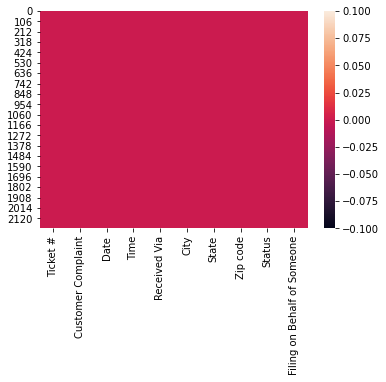

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.shape

(2224, 10)

In [8]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [9]:
#checking any duplicate values
df.duplicated().any()

False

In [10]:
result1=pd.DataFrame(df.nunique())#To get the unique values
result1

,0
Ticket #,2224
Customer Complaint,1841
Date,91
Time,2190
Received Via,2
City,928
State,43
Zip code,1543
Status,4
Filing on Behalf of Someone,2


In [11]:
df.isin(['?']).sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [12]:
df_main = df.rename(columns={'Ticket #':'Ticket','Customer Complaint':'Complaint','Received Via':'ReceivedVia','Zip code':'ZipCode','Filing on Behalf of Someone':'Filing'},inplace=False)

In [13]:
df_main

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing
0,250635,Comcast Cable Internet Speeds,22/04/2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18/04/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26/05/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,4/2/2015,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,6/2/2015,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,6/9/2015,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23/06/2015,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [14]:
#Task:3 - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
df_main['InsightStatus']= df_main['Status'].astype(str).replace('Pending','Open').replace('Solved','Closed')
df_main

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus
0,250635,Comcast Cable Internet Speeds,22/04/2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18/04/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26/05/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,4/2/2015,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,6/2/2015,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed
2221,331188,complaint about comcast,6/9/2015,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Closed
2222,360489,Extremely unsatisfied Comcast customer,23/06/2015,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed


In [15]:
df_main.InsightStatus.value_counts()

Closed    1707
Open       517
Name: InsightStatus, dtype: int64

# I.Location Exploration

### *1) State  Distribution*

Before we analyze the distribution of State location, we need to process the dataset. As we have seen from the dataset above, state city column. Since there is big amount of data, it would be better to see state vs InsightStatus.

<Figure size 720x576 with 0 Axes>

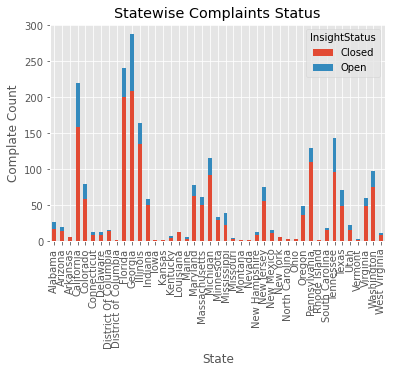

In [16]:
StBar = df_main.groupby(['State','InsightStatus'])["Ticket"].count().unstack().fillna(0)
#StBar.head(5)
style.use("ggplot")
plt.figure(figsize=(10,8))
StBar.plot(kind='bar', stacked=True)
plt.xlabel("State")
plt.ylabel("Complate Count")
plt.title("Statewise Complaints Status")
plt.xticks(rotation=90,ha='center')
plt.show()

In [17]:

highTab =  df_main.groupby(["State"])["Ticket"].count().reset_index(name="Count").sort_values(by='Count', ascending=False)
highTab.head(5)

,State,Count
10,Georgia,288
9,Florida,240
3,California,220
11,Illinois,164
36,Tennessee,143


### ? Which state has the highest percentage of unresolved complaints

In [18]:

highTab2 = df_main.groupby(["State",'InsightStatus'])["Ticket"].count().unstack().fillna(0).sort_values(by='Closed', ascending=False)
highTab2['Resoved_pct'] =(highTab2['Closed']/sum(highTab2['Closed'])*100).round(2)
highTab2['UnResoved_pct'] =(highTab2['Open']/sum(highTab2['Open'])*100).round(2)
highTab2.head(5)

InsightStatus,Closed,Open,Resoved_pct,UnResoved_pct
State,,,,
Georgia,208.0,80.0,12.19,15.47
Florida,201.0,39.0,11.78,7.54
California,159.0,61.0,9.31,11.80
Illinois,135.0,29.0,7.91,5.61
Pennsylvania,110.0,20.0,6.44,3.87


As we can see, the complaint distributed highly at Georgia  Florida,California etc. Therefore, I suggest for the company should start with  these areas to regain their reputation back.

In [19]:
highTab =  df_main.groupby(["State"])["Ticket"].count().reset_index(name="Count").sort_values(by='Count', ascending=True)
highTab.head(5)

,State,Count
25,Nevada,1
13,Iowa,1
24,Montana,1
34,Rhode Island,1
8,District of Columbia,1


### ? - Which state has the lowest percentage of unresolved complaints

In [20]:

highTab2 = df_main.groupby(["State",'InsightStatus'])["Ticket"].count().unstack().fillna(0).sort_values(by='Closed', ascending=True)
highTab2['Resoved_pct'] =(highTab2['Closed']/sum(highTab2['Closed'])*100).round(2)
highTab2['UnResoved_pct'] =(highTab2['Open']/sum(highTab2['Open'])*100).round(2)
highTab2.head(5)

InsightStatus,Closed,Open,Resoved_pct,UnResoved_pct
State,,,,
Nevada,1.0,0.0,0.06,0.00
Kansas,1.0,1.0,0.06,0.19
Iowa,1.0,0.0,0.06,0.00
Montana,1.0,0.0,0.06,0.00
District of Columbia,1.0,0.0,0.06,0.00


As we can see, the complaint distributed less at Nevada,lowa,Montana etc and these places need less attention.

### 2) Mode of communication  Distribution

In [21]:
df_main.ReceivedVia.value_counts()

Customer Care Call    1119
Internet              1105
Name: ReceivedVia, dtype: int64

#### ? Statewise complaints received through the Internet and customer care calls

* From the data we know there are two types of mode of communication i.e Customer Care Call and Internet let see how these are distributed in states.

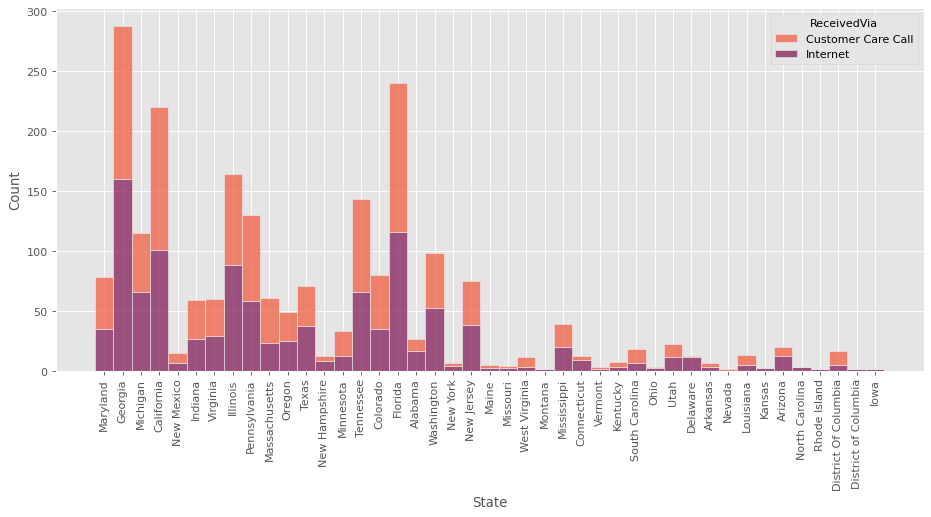

In [22]:
plt.figure(figsize=(14,6),dpi=80)

ax = sns.histplot(binwidth=0.5, x="State", hue="ReceivedVia", data=df_main, palette='rocket_r' , stat="count", multiple="stack")
ax.tick_params(axis='x', rotation=90)

### ? Provide the percentage of "State " complaints resolved till date, which were received through theInternet and customer care calls.

In [23]:
highTab3 = df_main.groupby(["State","ReceivedVia",'InsightStatus'])["Ticket"].count().unstack().fillna(0).sort_values(by='Closed', ascending=False)
highTab3['Resoved_pct'] =(highTab3['Closed']/sum(highTab3['Closed'])*100).round(2)
highTab3['UnResoved_pct'] =(highTab3['Open']/sum(highTab3['Open'])*100).round(2)
highTab3.head(5)

InsightStatus                  Closed  Open  Resoved_pct  UnResoved_pct
State      ReceivedVia                                                 
Georgia    Internet             112.0  48.0         6.56           9.28
Florida    Customer Care Call   105.0  19.0         6.15           3.68
           Internet              96.0  20.0         5.62           3.87
Georgia    Customer Care Call    96.0  32.0         5.62           6.19
California Customer Care Call    83.0  36.0         4.86           6.96

### ? Provide the percentage of  "City" complaints resolved till date, which were received through theInternet and customer care calls.

In [24]:
highTab3 = df_main.groupby(["State","City",'InsightStatus'])["Ticket"].count().unstack().fillna(0).sort_values(by='Open', ascending=False)
highTab3['Resoved_pct'] =(highTab3['Closed']/sum(highTab3['Closed'])*100).round(2)
highTab3['UnResoved_pct'] =(highTab3['Open']/sum(highTab3['Open'])*100).round(2)
highTab3.head(5)

,InsightStatus,Closed,Open,Resoved_pct,UnResoved_pct
State,City,,,,
Georgia,Atlanta,43.0,20.0,2.52,3.87
Tennessee,Knoxville,21.0,15.0,1.23,2.90
Texas,Houston,20.0,13.0,1.17,2.51
Florida,Miami,15.0,7.0,0.88,1.35
Tennessee,Nashville,15.0,7.0,0.88,1.35


# Conclusion

* As shown the above, we can conclude there are three main hotspots which located at approximately:

1.Georgia

2.Florida

3.California

These three places are the market with highest complaints and their closed and open cases are also listed above. To reduce the company complaints, it is highly recommended to focus around these three hotspots since there's a lot of customer spending their money there.

# II. Time Period Exploration

At this section, I would like to explore the customer complaints  based on timing approach.

### 1)  Complaints Timing

In [25]:
df_main["date_index"] = df_main["Date"] + " " + df_main["Time"]

In [26]:
df_main["date_index"] = pd.to_datetime(df_main["date_index"])
df_main["Date"] = pd.to_datetime(df_main["Date"])

In [27]:
df_main

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus,date_index
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,2015-04-08 10:22:56
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open,2015-05-07 11:59:35
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed,2015-05-26 13:25:26
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Closed,2015-04-02 09:13:18
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed,2015-06-02 13:24:39
2221,331188,complaint about comcast,2015-06-09,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Closed,2015-06-09 17:28:41
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed,2015-06-23 23:13:30


In [28]:
df_main['Date_month_year'] = pd.to_datetime(df_main['Date'])
df_main['Date'] = pd.to_datetime(df_main['Date'],format='%d-%m-%y')
df_main.dtypes

Ticket                     object
Complaint                  object
Date               datetime64[ns]
Time                       object
ReceivedVia                object
City                       object
State                      object
ZipCode                     int64
Status                     object
Filing                     object
InsightStatus              object
date_index         datetime64[ns]
Date_month_year    datetime64[ns]
dtype: object

In [29]:
df_main1= df_main.set_index(df_main["date_index"])
df_main1

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus,date_index,Date_month_year
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,2015-04-22 15:53:50,2015-04-22
2015-04-08 10:22:56,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,2015-04-08 10:22:56,2015-04-08
2015-04-18 09:55:47,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,2015-04-18 09:55:47,2015-04-18
2015-05-07 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open,2015-05-07 11:59:35,2015-05-07
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed,2015-05-26 13:25:26,2015-05-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-02 09:13:18,213550,Service Availability,2015-04-02,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Closed,2015-04-02 09:13:18,2015-04-02
2015-06-02 13:24:39,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed,2015-06-02 13:24:39,2015-06-02
2015-06-09 17:28:41,331188,complaint about comcast,2015-06-09,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Closed,2015-06-09 17:28:41,2015-06-09


In [30]:
##Cleaning of irrelvant value from Ticket Column which was "comcas".
## Changing the data type of Ticket column.
df_main = df_main[df_main['Ticket']!='comcas']
df_main.Ticket = df_main.Ticket.astype(int)
df_main.Date = pd.to_datetime(df_main.Date_month_year)

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
df_main

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus,date_index,Date_month_year
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,2015-04-22 15:53:50,2015-04-22
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,2015-04-08 10:22:56,2015-04-08
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,2015-04-18 09:55:47,2015-04-18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open,2015-05-07 11:59:35,2015-05-07
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed,2015-05-26 13:25:26,2015-05-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Closed,2015-04-02 09:13:18,2015-04-02
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed,2015-06-02 13:24:39,2015-06-02
2221,331188,complaint about comcast,2015-06-09,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Closed,2015-06-09 17:28:41,2015-06-09
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed,2015-06-23 23:13:30,2015-06-23


In [32]:
# Removing Duplicates if any

df_main.drop_duplicates(subset ="Ticket", keep = False, inplace = True)

<ipython-input-32-2eb98c202f94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.drop_duplicates(subset ="Ticket", keep = False, inplace = True)


In [33]:
##Creating Variable for Days, Month, Year
import calendar
df_main['year']= df_main['Date'].dt.year
df_main['month']= df_main['Date'].dt.month
df_main['day']= df_main['Date'].dt.day
df_main['dayname']= df_main['Date'].dt.day_name()
df_main['MonthName']= df_main['month'].apply(lambda x: calendar.month_name[x])
df_main['Complaint']= df_main['Complaint'].str.title()
df_main.head(5)

<ipython-input-33-e11d231bc231>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['year']= df_main['Date'].dt.year
<ipython-input-33-e11d231bc231>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['month']= df_main['Date'].dt.month
<ipython-input-33-e11d231bc231>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus,date_index,Date_month_year,year,month,day,dayname,MonthName
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,2015-04-22 15:53:50,2015-04-22,2015,4,22,Wednesday,April
1,223441,Payment Disappear - Service Got Disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,2015-04-08 10:22:56,2015-04-08,2015,4,8,Wednesday,April
2,242732,Speed And Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,2015-04-18 09:55:47,2015-04-18,2015,4,18,Saturday,April
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open,2015-05-07 11:59:35,2015-05-07,2015,5,7,Thursday,May
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed,2015-05-26 13:25:26,2015-05-26,2015,5,26,Tuesday,May


### A.  Hour Wise

Next, we take only the hour part from the complaint time.The following graph shows complaint time in hour.

In [34]:
df_main['Time'] = pd.to_datetime(df_main['Time'])

<ipython-input-34-83e75831e7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Time'] = pd.to_datetime(df_main['Time'])


In [35]:
best_time_hours = (df_main['Time']).dt.hour

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

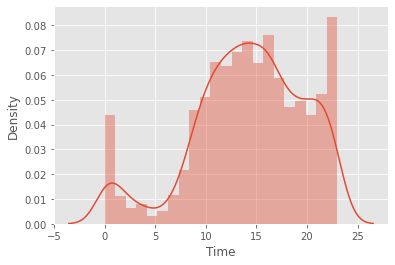

In [36]:
sns.distplot(best_time_hours)

As shown above, most of the customers purchase products around 8 am until 24 pm.

### B. Day wise

* Week Wise Daily Complaints

In [37]:
ComGrp = df_main.groupby('dayname')
dt1= ComGrp.count()
NewDay = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dt1 = dt1.reindex(NewDay, axis=0)
dt1 =dt1.replace(np.NaN, 0)
dt1.head(5)

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus,date_index,Date_month_year,year,month,day,MonthName
dayname,,,,,,,,,,,,,,,,,
Sunday,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
Monday,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296
Tuesday,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466
Wednesday,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460
Thursday,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365


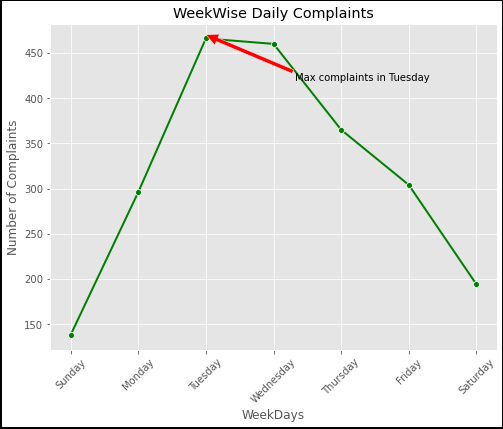

In [38]:
style.use("ggplot")
plt.figure(figsize=(8,6),edgecolor='black',linewidth=4)
sns.lineplot(x='dayname',y='Ticket', data=dt1, color = 'g' , linewidth = 2,marker='o')
plt.xlabel("WeekDays")
plt.ylabel("Number of Complaints")
plt.title("WeekWise Daily Complaints")
plt.xticks(rotation=45)
plt.annotate('Max complaints in Tuesday', color='black',
            xy=(2, 470), xycoords='data',
            xytext=(0.85, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.002),
            horizontalalignment='right', verticalalignment='top')
plt.show()

As we can see, the highest number of complaints is on Tuesday, then Wednesday. However, even in other days the number ofcomplaints not significanlly low, I recommend we can give less consderation  in Saturday and Sunday, since it is the lowest.

### 3)  Month Wise

### Provide the trend chart for the number of complaints at monthly and daily granularity levels.Monthly Complaints

In [39]:
ComGrp = df_main.groupby('MonthName')
dt= ComGrp.count()
NewMonth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dt = dt.reindex(NewMonth, axis=0)
dt =dt.replace(np.NaN, 0)
dt.head(12)

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus,date_index,Date_month_year,year,month,day,dayname
MonthName,,,,,,,,,,,,,,,,,
January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
February,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
March,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
April,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0,544.0
May,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0,399.0
June,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0,1280.0
July,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
September,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


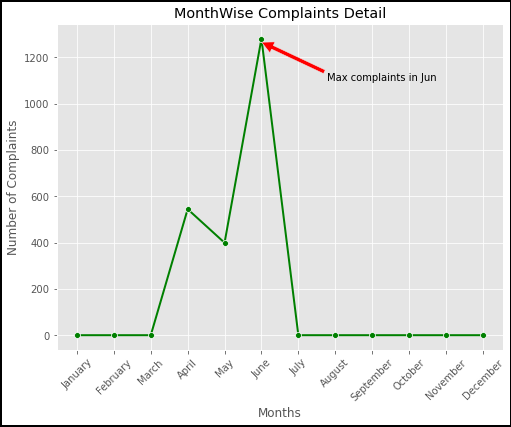

In [40]:
##Monthly Complaints Showing on Plot
style.use("ggplot")
plt.figure(figsize=(8,6),edgecolor='black',linewidth=4)
sns.lineplot(x='MonthName',y='Ticket', data=dt, color = 'g' , linewidth = 2,marker='o')
plt.xlabel("Months")
plt.ylabel("Number of Complaints")
plt.title("MonthWise Complaints Detail")
plt.annotate('Max complaints in Jun', color='black',
            xy=(5, 1265), xycoords='data',
            xytext=(0.85, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.002),
            horizontalalignment='right', verticalalignment='top')
plt.xticks(rotation=45)
plt.show()

As shown above, the highest number of complaints in june. However, even in other months the number of complaints not significanlly low, but in May number of complaints is the lowest.

In [41]:
##Month Wise Daily Complaints
ComGrp = df_main.groupby('day')
dt3= ComGrp.count()
dt3.head(7)

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus,date_index,Date_month_year,year,month,dayname,MonthName
day,,,,,,,,,,,,,,,,,
1,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
2,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
3,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
4,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
5,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
6,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
7,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49


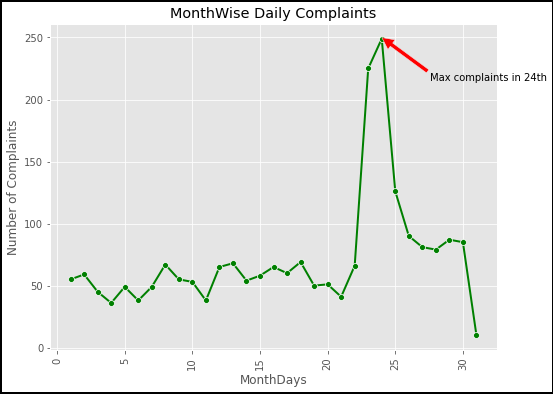

In [42]:
style.use("ggplot")
plt.figure(figsize=(8,6),edgecolor='black',linewidth=4)
sns.lineplot(x='day',y='Ticket', data=dt3, color = 'g' , linewidth = 2,marker='o')
plt.xlabel("MonthDays")
plt.ylabel("Number of Complaints")
plt.title("MonthWise Daily Complaints")
plt.xticks(rotation=90)
plt.annotate('Max complaints in 24th', color='black',
            xy=(24, 250), xycoords='data',
            xytext=(0.85, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.002),
            horizontalalignment='left', verticalalignment='top')
plt.show()

As shown above, the highest number of complaints in 24th of the months. However, even in other days the number of complaints not significanlly low, but in 31st number of complaints is the lowest.

# Conclusion

Based on the previous analysis, I recommend the company to solve complaints on:

* Hour: Around 8 am - 24 pm

* Day: Tuesday, Wednesday

* Month: June, April

It might be okay to solve on another time besides the time I mentioned above, since it is not significanlly different. However, there are some time with low number of complaints which the company can avoid:

* Hour: Around 3 am - 6 am

* Day: Sunday

* Month: May

# III. Complaint Behaviour Exploration

This section will analyze the behaviour of complaints and catagorize each complaints to be paid attention furtherly. 

The following program will catagorize complaints based on keywords provided. It seems that we need pass our dataset, so we need to put some condition and string operation  on complaint column.

In [43]:
# Create a new column to list the types of Customer Complaints
df_main["Complaint Catagory"] = np.where(df_main["Complaint"].str.contains('Internet|Speed|wifi|Access|Throttling|throt|Broadband|Cable|connection|DSL|modem|ip|ISP',case=False,regex=True), 'Internet',
         np.where(df_main["Complaint"].str.contains('\$|Price|Pricing|Cost|Payment|Charg|pay|Bill|Billing|Rate|Contract|fee',case=False,regex=True), 'Billing',
         np.where(df_main["Complaint"].str.contains('Service|Cap|usage|Data|Customer|switch|wait|support|TV|avail|network|cramming',case=False,regex=True), 'Network',
         np.where(df_main["Complaint"].str.contains('Customer|complaint|breach|bully|False|fed up',case=False,regex=True), 'Grievance',
         np.where(df_main["Complaint"].str.contains('email',case=False,regex=True), 'Email',
         np.where(df_main["Complaint"].str.contains('outage',case=False,regex=True), 'Outages',
         'Other'))))))

<ipython-input-43-319ded503e69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["Complaint Catagory"] = np.where(df_main["Complaint"].str.contains('Internet|Speed|wifi|Access|Throttling|throt|Broadband|Cable|connection|DSL|modem|ip|ISP',case=False,regex=True), 'Internet',


In [44]:
# Display Catagorised Category in tabuler format
print(tabulate(df_main.groupby(["Complaint Catagory"]).size().to_frame(), headers=['Complaint Category','Number of Complaints'], tablefmt="fancy_grid"))

╒══════════════════════╤════════════════════════╕
│ Complaint Category   │   Number of Complaints │
╞══════════════════════╪════════════════════════╡
│ Billing              │                    553 │
├──────────────────────┼────────────────────────┤
│ Email                │                      8 │
├──────────────────────┼────────────────────────┤
│ Grievance            │                     42 │
├──────────────────────┼────────────────────────┤
│ Internet             │                    764 │
├──────────────────────┼────────────────────────┤
│ Network              │                    442 │
├──────────────────────┼────────────────────────┤
│ Other                │                    409 │
├──────────────────────┼────────────────────────┤
│ Outages              │                      5 │
╘══════════════════════╧════════════════════════╛


# Conclusion

I recommend to take appropriate solving action based on the segment of Complaint Catagory  to keep them happy and keep generating profit.

# IV. Complaint Catagory Exploration

At this section, we will explore the product from the market.

### 1) Popularity Analysis
This section will focus on exploring the popularity of Complaint. Before we analyze, let's take a look at Complaint translation dataset.

In [45]:
df_main.head()

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus,date_index,Date_month_year,year,month,day,dayname,MonthName,Complaint Catagory
0,250635,Comcast Cable Internet Speeds,2015-04-22,2022-06-18 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,2015-04-22 15:53:50,2015-04-22,2015,4,22,Wednesday,April,Internet
1,223441,Payment Disappear - Service Got Disconnected,2015-04-08,2022-06-18 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,Closed,2015-04-08 10:22:56,2015-04-08,2015,4,8,Wednesday,April,Billing
2,242732,Speed And Service,2015-04-18,2022-06-18 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,2015-04-18 09:55:47,2015-04-18,2015,4,18,Saturday,April,Internet
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-05-07,2022-06-18 11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,Open,2015-05-07 11:59:35,2015-05-07,2015,5,7,Thursday,May,Network
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,2022-06-18 13:25:26,Internet,Acworth,Georgia,30101,Solved,No,Closed,2015-05-26 13:25:26,2015-05-26,2015,5,26,Tuesday,May,Network


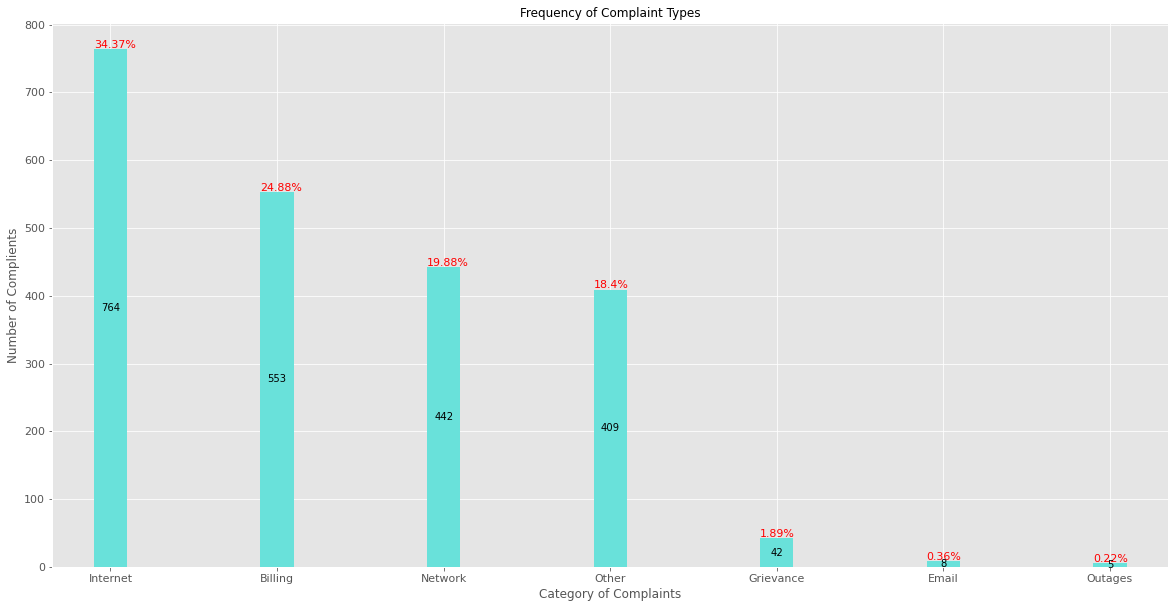

In [46]:
#Percentage of Issues By Category
ax = df_main['Complaint Catagory'].value_counts().plot(kind='bar', figsize=(20,10), color="#69E1DA", fontsize=11,width=0.2);
ax.set_alpha(0.8)
ax.set_title("Frequency of Complaint Types", fontsize=12)
ax.set_xlabel("Category of Complaints", fontsize=12);
ax.set_ylabel("Number of Complients", fontsize=12);
ax.tick_params(axis='x', labelrotation=360)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.text(i.get_x(), i.get_height()+2, str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,color ="red")
    ax.text(x+width/2, y+height/2,'{:.0f}'.format(height), horizontalalignment='center', verticalalignment='center')

* As we can see, it is actually complaint category ie internet to have 34.37 % is the first position of the complaints,billing and network in second and third position respectievely. 

### ? Provide the percentage of complaints resolved till date, which were received through Complaint Catagory.

In [47]:
# Display Catagorised Category in tabuler format
print(tabulate(df_main.groupby(["Complaint Catagory"]).size().to_frame(), headers=['Complaint Category','Number of Complaints'], tablefmt="fancy_grid"))

╒══════════════════════╤════════════════════════╕
│ Complaint Category   │   Number of Complaints │
╞══════════════════════╪════════════════════════╡
│ Billing              │                    553 │
├──────────────────────┼────────────────────────┤
│ Email                │                      8 │
├──────────────────────┼────────────────────────┤
│ Grievance            │                     42 │
├──────────────────────┼────────────────────────┤
│ Internet             │                    764 │
├──────────────────────┼────────────────────────┤
│ Network              │                    442 │
├──────────────────────┼────────────────────────┤
│ Other                │                    409 │
├──────────────────────┼────────────────────────┤
│ Outages              │                      5 │
╘══════════════════════╧════════════════════════╛


In [48]:
highTab3 = df_main.groupby(["Complaint Catagory",'InsightStatus'])["Ticket"].count().unstack().fillna(0).sort_values(by='Closed', ascending=False)
highTab3['Resoved_pct'] =(highTab3['Closed']/sum(highTab3['Closed'])*100).round(2)
highTab3['UnResoved_pct'] =(highTab3['Open']/sum(highTab3['Open'])*100).round(2)
highTab3.head(7)

InsightStatus,Closed,Open,Resoved_pct,UnResoved_pct
Complaint Catagory,,,,
Internet,553,211,32.42,40.81
Billing,459,94,26.91,18.18
Other,335,74,19.64,14.31
Network,315,127,18.46,24.56
Grievance,34,8,1.99,1.55
Email,7,1,0.41,0.19
Outages,3,2,0.18,0.39


### ? Complaint Catagory received through the Internet and customer care calls


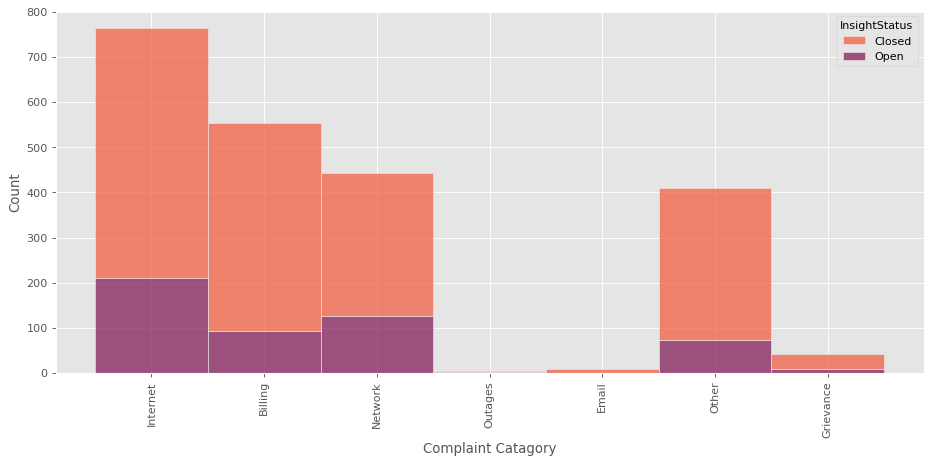

In [49]:
plt.figure(figsize=(14,6),dpi=80)

ax = sns.histplot(binwidth=0.5, x="Complaint Catagory", hue="InsightStatus", data=df_main, palette='rocket_r' , stat="count", multiple="stack")
ax.tick_params(axis='x', rotation=90)

### ? Statewise complaints received through the Complaint Catagory.

In [50]:
comp_type=pd.crosstab(df_main['State'],df_main['Complaint Catagory'])
comp_type

Complaint Catagory,Billing,Email,Grievance,Internet,Network,Other,Outages
State,,,,,,,
Alabama,9,0,0,3,11,3,0
Arizona,3,0,0,6,10,1,0
Arkansas,0,0,0,4,0,2,0
California,66,2,10,85,20,35,2
Colorado,19,0,2,30,7,22,0
Connecticut,2,0,0,7,3,0,0
Delaware,3,0,1,4,3,1,0
District Of Columbia,7,0,1,4,2,2,0
District of Columbia,0,0,0,1,0,0,0


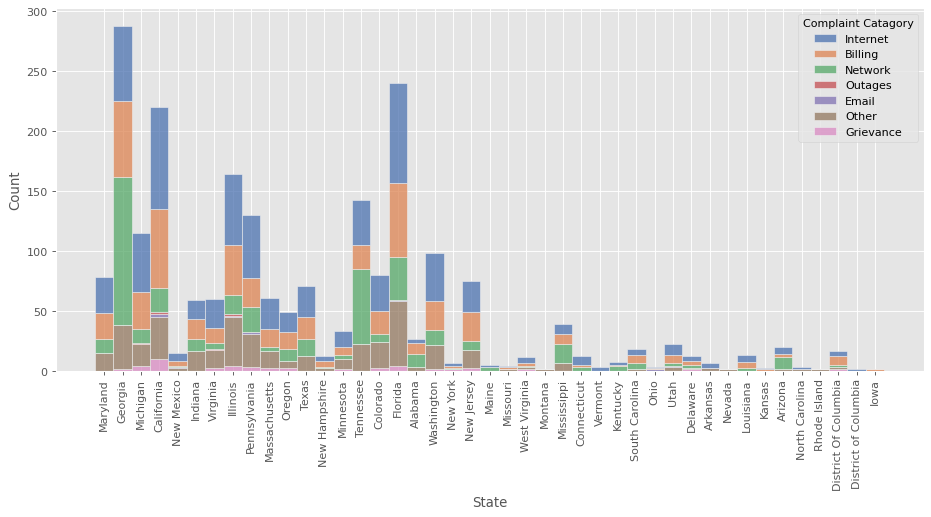

In [51]:
plt.figure(figsize=(14,6),dpi=80)

ax = sns.histplot(binwidth=0.5, x="State", hue="Complaint Catagory", data=df_main, palette='deep' , stat="count", multiple="stack")
ax.tick_params(axis='x', rotation=90)

In [52]:
top_States=['Georgia', 'Florida', 'California']

In [53]:
tdf=df_main.loc[df_main['State'].isin(top_States)]
tdf

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,InsightStatus,date_index,Date_month_year,year,month,day,dayname,MonthName,Complaint Catagory
1,223441,Payment Disappear - Service Got Disconnected,2015-04-08,2022-06-18 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,Closed,2015-04-08 10:22:56,2015-04-08,2015,4,8,Wednesday,April,Billing
2,242732,Speed And Service,2015-04-18,2022-06-18 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,2015-04-18 09:55:47,2015-04-18,2015,4,18,Saturday,April,Internet
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-05-07,2022-06-18 11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,Open,2015-05-07 11:59:35,2015-05-07,2015,5,7,Thursday,May,Network
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,2022-06-18 13:25:26,Internet,Acworth,Georgia,30101,Solved,No,Closed,2015-05-26 13:25:26,2015-05-26,2015,5,26,Tuesday,May,Network
5,338519,Isp Charging For Arbitrary Data Limits With Ov...,2015-06-12,2022-06-18 21:59:40,Internet,Acworth,Georgia,30101,Solved,No,Closed,2015-06-12 21:59:40,2015-06-12,2015,6,12,Friday,June,Internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,357824,Lied To About Install Costs,2015-06-23,2022-06-18 11:26:08,Customer Care Call,Woodstock,Georgia,30188,Solved,No,Closed,2015-06-23 11:26:08,2015-06-23,2015,6,23,Tuesday,June,Billing
2206,360908,Issues With Comcast Billing And Equipment,2015-06-24,2022-06-18 08:00:17,Internet,Woodstock,Georgia,30188,Solved,No,Closed,2015-06-24 08:00:17,2015-06-24,2015,6,24,Wednesday,June,Internet
2207,363934,Comcast Internet,2015-06-25,2022-06-18 09:00:09,Internet,Woodstock,Georgia,30188,Solved,No,Closed,2015-06-25 09:00:09,2015-06-25,2015,6,25,Thursday,June,Internet
2208,374570,Comcast Cap,2015-06-30,2022-06-18 12:42:45,Customer Care Call,Woodstock,Georgia,30188,Pending,No,Open,2015-06-30 12:42:45,2015-06-30,2015,6,30,Tuesday,June,Network


In [54]:
tdf.shape

(748, 19)

In [55]:
comp_type1=pd.crosstab(tdf['State'],tdf['Complaint Catagory'])
comp_type1

Complaint Catagory,Billing,Email,Grievance,Internet,Network,Other,Outages
State,,,,,,,
California,66,2,10,85,20,35,2
Florida,62,1,4,83,36,54,0
Georgia,63,0,1,63,124,37,0


In [56]:
highTab4 = tdf.groupby(['City','Complaint Catagory','InsightStatus'])["Ticket"].count().unstack().fillna(0).sort_values(by='Open', ascending=False)
highTab4.head(10)

,InsightStatus,Closed,Open
City,Complaint Catagory,,
Atlanta,Network,19.0,12.0
San Francisco,Internet,4.0,4.0
Miami,Internet,5.0,4.0
Atlanta,Billing,8.0,4.0
Miami,Billing,1.0,3.0
Lilburn,Network,1.0,3.0
Santa Clara,Internet,0.0,3.0
Sacramento,Internet,2.0,3.0
Atlanta,Internet,10.0,3.0


# Conclusion

We can conclude from this analysis that State: Georgia, Florida,California company need to give more focus on . 

I recommend for the company to:

Give more importance to the open complaints in various complaint categories in the cities ofabove states mentioned for example Atlanta, San Francisco, Miami etc.....

### 2) Sentiment Analysis

Besides the complaint categories, I am also considering the complaint comment of the product. 
Next, I am gonna analyse the sentiment of the comment of each ticket. However, the data is still a mess, so I am gonna clean it by removing punctuation and symbols.

In [57]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [59]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [60]:
!pip install wordcloud

In [61]:
pip install clean-text

Note: you may need to restart the kernel to use updated packages.


In [62]:
import nltk
from textblob import TextBlob
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from textblob import TextBlob
import re
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from cleantext import clean as cleaner
from sklearn.decomposition import TruncatedSVD

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [63]:
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words(
    'english')  # or any other list of your choice


def clean_text(text, ):
    def tokenize_text(text):
        return [w for s in sent_tokenize(text) for w in word_tokenize(s)]

    def remove_special_characters(text,
                                  characters=string.punctuation.replace(
                                      '-', '')):
        tokens = tokenize_text(text)
        pattern = re.compile('[{}]'.format(re.escape(characters)))
        return ' '.join(filter(None, [pattern.sub('', t) for t in tokens]))

    def remove_stopwords(text, stop_words=default_stopwords):
        tokens = [w for w in tokenize_text(text) if w not in stop_words]
        return ' '.join(tokens)

    text = text.strip(' ')  # strip whitespaces
    text = text.lower()  # lowercase
    text = remove_special_characters(text)  # remove punctuation and symbols
    #text.strip(' ') # strip whitespaces again?

    return text

In [64]:
def isNaN(num):
    return num != num


def sentimen_en(text):
    if isNaN(text) == True:
        return np.nan
    else:
        hasil = TextBlob(text).sentiment[0]
        return hasil

In [65]:
df_main['clean'] = df_main['Complaint'].apply(lambda x: clean_text(cleaner(x)))

<ipython-input-65-e7c2791beb87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['clean'] = df_main['Complaint'].apply(lambda x: clean_text(cleaner(x)))


In [66]:
df_main['sentimen'] = df_main['clean'].apply(lambda x: sentimen_en(x))

<ipython-input-66-1fe1b02e84e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['sentimen'] = df_main['clean'].apply(lambda x: sentimen_en(x))


In [67]:
mask = df_main['Complaint'].apply(lambda x: not isNaN(x))

In [68]:
df_main[mask][['clean', 'sentimen']].sample(10)

,clean,sentimen
969,complaints about comcast,0.000000
1484,comcast xfinity internet performance,0.000000
2089,pay 2500 for cable line,0.000000
547,prolonged internet outage tardy response,0.000000
247,failure to supply the proper internet service,-0.158333
691,charged for services not provided,0.000000
2126,comcast misleading hsi customers,0.000000
2020,customer service,0.000000
998,comcast service,0.000000
495,comcast data caps,0.000000


In [69]:
bins = [-1, -0.3, 0.3, 1]
labels = ['negative', 'unsure', 'positive']
df_main['sentimen_label'] = pd.cut(df_main['sentimen'], bins=bins, labels=labels)

<ipython-input-69-82e35ebd9183>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['sentimen_label'] = pd.cut(df_main['sentimen'], bins=bins, labels=labels)


In [70]:
df_main[mask].groupby('sentimen_label').apply(lambda x: x.sample(10))[[
    'clean', 'sentimen'
]]

clean  \
sentimen_label                                                           
negative       104                                bad customer service   
               1437                 comcast dishonest marketing scheme   
               576                          i am being unfairly billed   
               1362              dishonest billing practices and lying   
               632                comcast of east windsor nj complaint   
               2147  deceptive trade practices false advertising an...   
               2095                                      slow internet   
               753                                     netflix is slow   
               1996                     complaint about comcastxfinity   
               1266                                  comcast complaint   
unsure         1198                              internet availability   
               819                           comcast billing practices   
               2090               inability to get service transferred   
               1795                                      comcast fraud   
               1282         comcast new signup billing bait-and-switch   
               160                              comcast hbo go ps4 app   
               1577                                       bill payment   
               1708                        comcast internet usage caps   
               995                                       comcast cable   
               1918                                            comcast   
positive       238   keep getting charged rental fees for modem i a...   
               1828                   huge number of lies from comcast   
               1500  comcast service rep missed appointment i misse...   
               1557  was liked to about the speed and the price tha...   
               2157  comcast charge my own router as unreturned equ...   
               427   comcast started charging a lease fee for equip...   
               1043     comcast data cap interference with free market   
               1035           continued slowness for more than 2 weeks   
               935   keep getting charged for modem rental and i bo...   
               859         hang-ups lies bill more than 2x higher more   

                     sentimen  
sentimen_label                 
negative       104  -0.700000  
               1437 -0.300000  
               576  -0.500000  
               1362 -0.300000  
               632  -0.300000  
               2147 -0.400000  
               2095 -0.300000  
               753  -0.300000  
               1996 -0.300000  
               1266 -0.300000  
unsure         1198  0.000000  
               819   0.000000  
               2090  0.000000  
               1795  0.000000  
               1282  0.136364  
               160   0.000000  
               1577  0.000000  
               1708  0.000000  
               995   0.000000  
               1918  0.000000  
positive       238   0.600000  
               1828  0.400000  
               1500  0.520000  
               1557  0.600000  
               2157  0.600000  
               427   0.600000  
               1043  0.400000  
               1035  0.500000  
               935   0.600000  
               859   0.416667

In [71]:
data_sample_negative = df_main[mask][df_main['sentimen_label'] == "negative"].sample(100)

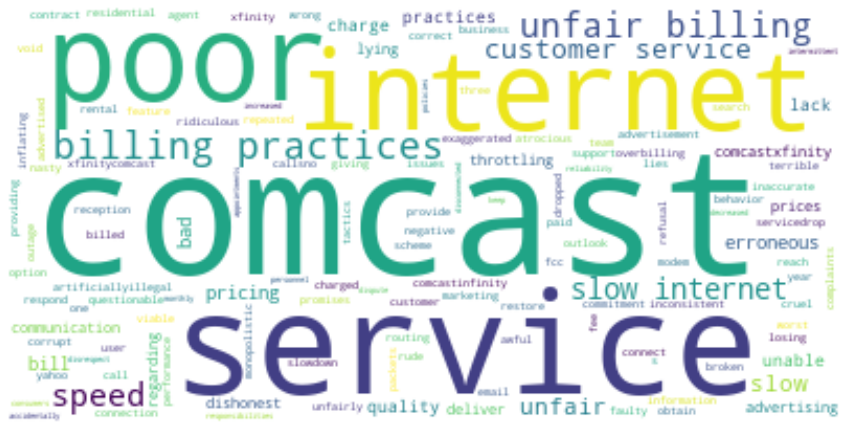

In [72]:
# Wordcloud
text = " ".join(text for text in data_sample_negative['clean'])
stopwords = set(STOPWORDS)
stopwords.update(
    ['complaint', 'improper', 'incorrect', 'fraudulent', 'false', 'issue', 'deceptive', 'refund',
     'slowing','failure','claim'])  #Adding Stopword

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.rcParams["figure.figsize"] = (15, 8)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* From the wordcloud above, we can analyse that most of negative comments are about the sevices, of the company. This could be the company feedbacks to improve the Comcast's customer service.

### Conclusion

By analyzing the sentiment of the comment, this can be the company consideration to improve their market. Since I only focusing on the negative sentiment, I recommend for the company to:

* Take a look at the quality of the customer services of the company ie people who are handling the complaints.
* Check your Internet performance and speed since it is the second most customer concern.
* Pay attention on the billing and pricing, it may has problems since the customer mentioned it frequently.

In [73]:
#df_main

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,...,Date_month_year,year,month,day,dayname,MonthName,Complaint Catagory,clean,sentimen,sentimen_label
0,250635,Comcast Cable Internet Speeds,2015-04-22,2022-06-18 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,...,2015-04-22,2015,4,22,Wednesday,April,Internet,comcast cable internet speeds,0.000000,unsure
1,223441,Payment Disappear - Service Got Disconnected,2015-04-08,2022-06-18 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,...,2015-04-08,2015,4,8,Wednesday,April,Billing,payment disappear - service got disconnected,0.000000,unsure
2,242732,Speed And Service,2015-04-18,2022-06-18 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,...,2015-04-18,2015,4,18,Saturday,April,Internet,speed and service,0.000000,unsure
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-05-07,2022-06-18 11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,...,2015-05-07,2015,5,7,Thursday,May,Network,comcast imposed a new usage cap of 300gb that ...,0.136364,unsure
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,2022-06-18 13:25:26,Internet,Acworth,Georgia,30101,Solved,No,...,2015-05-26,2015,5,26,Tuesday,May,Network,comcast not working and no service to boot,0.000000,unsure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,2022-06-18 09:13:18,Customer Care Call,Youngstown,Florida,32466,Closed,No,...,2015-04-02,2015,4,2,Thursday,April,Network,service availability,0.000000,unsure
2220,318775,Comcast Monthly Billing For Returned Modem,2015-06-02,2022-06-18 13:24:39,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,...,2015-06-02,2015,6,2,Tuesday,June,Internet,comcast monthly billing for returned modem,0.000000,unsure
2221,331188,Complaint About Comcast,2015-06-09,2022-06-18 17:28:41,Internet,Ypsilanti,Michigan,48197,Solved,No,...,2015-06-09,2015,6,9,Tuesday,June,Grievance,complaint about comcast,-0.300000,negative
2222,360489,Extremely Unsatisfied Comcast Customer,2015-06-23,2022-06-18 23:13:30,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,...,2015-06-23,2015,6,23,Tuesday,June,Network,extremely unsatisfied comcast customer,-0.125000,unsure


In [74]:
#res1 = df_main.copy(deep=True)
#res1

,Ticket,Complaint,Date,Time,ReceivedVia,City,State,ZipCode,Status,Filing,...,Date_month_year,year,month,day,dayname,MonthName,Complaint Catagory,clean,sentimen,sentimen_label
0,250635,Comcast Cable Internet Speeds,2015-04-22,2022-06-18 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,...,2015-04-22,2015,4,22,Wednesday,April,Internet,comcast cable internet speeds,0.000000,unsure
1,223441,Payment Disappear - Service Got Disconnected,2015-04-08,2022-06-18 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,...,2015-04-08,2015,4,8,Wednesday,April,Billing,payment disappear - service got disconnected,0.000000,unsure
2,242732,Speed And Service,2015-04-18,2022-06-18 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,...,2015-04-18,2015,4,18,Saturday,April,Internet,speed and service,0.000000,unsure
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-05-07,2022-06-18 11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,...,2015-05-07,2015,5,7,Thursday,May,Network,comcast imposed a new usage cap of 300gb that ...,0.136364,unsure
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,2022-06-18 13:25:26,Internet,Acworth,Georgia,30101,Solved,No,...,2015-05-26,2015,5,26,Tuesday,May,Network,comcast not working and no service to boot,0.000000,unsure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,2022-06-18 09:13:18,Customer Care Call,Youngstown,Florida,32466,Closed,No,...,2015-04-02,2015,4,2,Thursday,April,Network,service availability,0.000000,unsure
2220,318775,Comcast Monthly Billing For Returned Modem,2015-06-02,2022-06-18 13:24:39,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,...,2015-06-02,2015,6,2,Tuesday,June,Internet,comcast monthly billing for returned modem,0.000000,unsure
2221,331188,Complaint About Comcast,2015-06-09,2022-06-18 17:28:41,Internet,Ypsilanti,Michigan,48197,Solved,No,...,2015-06-09,2015,6,9,Tuesday,June,Grievance,complaint about comcast,-0.300000,negative
2222,360489,Extremely Unsatisfied Comcast Customer,2015-06-23,2022-06-18 23:13:30,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,...,2015-06-23,2015,6,23,Tuesday,June,Network,extremely unsatisfied comcast customer,-0.125000,unsure


In [75]:
#res1df =res1.drop(columns = ['Ticket','Date','Time','ReceivedVia','City','State','ZipCode','Status','Filing','Date_month_year','year','month','day','dayname','MonthName','sentimen','sentimen_label','InsightStatus','date_index','Complaint']) 

In [76]:
#res1df.to_csv("Complaint_Narrative.csv" ,index=False)